<a href="https://colab.research.google.com/github/Tajyu/TensorFlow-Tutotrial/blob/main/%EA%B8%B0%EB%B3%B8_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 텐서와 케라스를 import
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


### Fashion Mnist 불러오기

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Numpy 형태로 데이터가 들어와있다.

In [6]:
type(train_images)

numpy.ndarray

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               " Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # 10개

### Label이 숫자 형태로 되어있다.

In [8]:
train_labels[:3]

array([9, 0, 0], dtype=uint8)

## 데이터 탐색

In [9]:
train_images.shape # 60,000개의 이미지가 있고, 28 x 28 형태로 되어있다.

(60000, 28, 28)

In [10]:
len(train_images) # 훈련세트에는 60,000개의 이미지(레이블)가 있다.

60000

In [11]:
train_labels # 각 레이블은 0과 9사이의 정수이다.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape # 테스트(레이블) 이미지는 10,000개가 있고, 28 x 28 형태이다. -> 1/6 정도가 테스트 이미지(레이블)이다.

(10000, 28, 28)

In [13]:
len(test_images) # 테스트 세트에는 10,000개의 이미지(레이블)가 있다.

10000

## 데이터 전처리
### 네트워크를 훈련하기 전에 데이터를 전처리해야한다.
### 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0 ~ 255 사이라는 것을 알 수 있다.

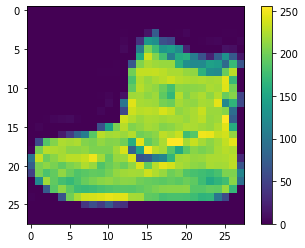

In [14]:
plt.figure()
plt.imshow(train_images[0]) # 인덱스는 0부터 시작이라 첫번째(1) 이미지
plt.colorbar()
plt.grid(False)
plt.show()

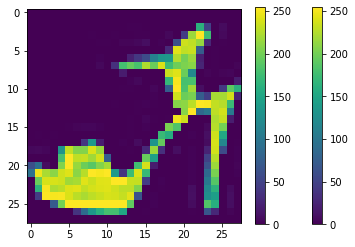

In [15]:
plt.figure()
plt.imshow(train_images[9]) # 인덱스는 0부터 시작이라 아홉번째(9) 이미지
plt.colorbar()
plt.colorbar()
plt.grid(False)
plt.show()

## 신경망 모델에 주입하기 전에 이 값의 범위를 0 ~ 1 사이로 조정한다.
### 이렇게 할려면 255로 나누어야 한다.
### 훈련 세트와 테스트 세트를 동일한 방식으로 전처리해야한다. 

In [16]:
 train_images = train_images / 255.0
 test_images = test_images / 255.0

## 훈련 세트에서 처음 25개의 이미지와 그 아래 클래스 이름을 출력.
### 데이터 포맷이 맞는지 확인하고 네트워크 구성과 훈련을 할 준비를 한다.

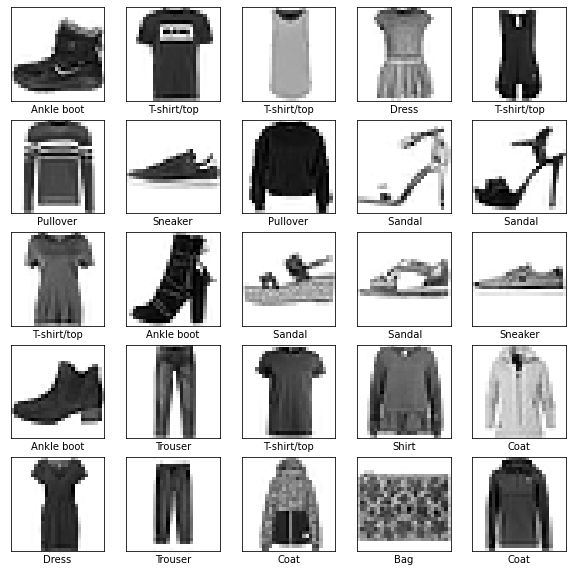

In [17]:
plt.figure(figsize = (10, 10)) # figure 크기를 10 x 10으로 한다.
for i in range(25):
    plt.subplot(5, 5, i + 1) # 5 x 5로 보여진다. -> 5 x 5로 나타나질떄까찌 이미지를 하나씩 증가 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## 학습된 모델로 새로운 모델 구성
### 신경망 모델을 만들려면 모델의 층을 구성한  다음 모델을 컴파일한다.

## 층 설정
### 신경망의 기본 구성 요소는 층(layer)이다.
### 층(layer)는 주입된 데이터에서 표현을 추출한다.
### 아마도 문제를 해결하는데 더 의미있는 표현이 추출 될 것이다.


### 대부분 딥러닝은 간단한 층을 연결하여 구성된다.
### **tf.keras.layers.Dense**와 같은 층들의 **가중치(parameter)**는 훈련하는 동안 학습된다.

### **keras.layers.Flatten**는 2차원 배열을 1차원 배열로 변환. 즉, 펼친다.

In [18]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape = (28, 28)), # 28 x 28로 된 텐서를 1차원 텐서로 펼친다. -> 28 x 28 = 784개의 텐서로 펼쳐진다.
                        keras.layers.Dense(128, activation = 'relu'),
                        keras.layers.Dense(10, activation = "softmax") # 위에 class_names가 10개기때문에 10으로 설정
])

## 모델 컴파일
### 모델을 훈련하기 전에 필요한 설정이 모델 컴파일 단계에서 추가된다.
### - **손실 함수(Loss function)**: 훈련하는 동안 모델의 오차를 측정하고,   모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화 해야한다.
### - **옵티마이저(Optimizer)**: 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정한다.
### - **지표(Metrics)**: 훈련 단계와 테스트 단계를 모니터링하기 위해 사용되며, 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용한다.

In [22]:
model.compile(optimizer = 'adam', # "옵티마이저로 adam을 사용"
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
              

## 모델 훈련
### 신경망 모델을 훈련하는 단계는 아래와 같다.
### **1.** 훈련데이터를 모델에 주입한다. 
###    - 이 예에서는 **train_images**와 **train_labels** 배열 이다.
### **2.** 모델의 이미지와 레이블을 매핑하는 방법을 배운다.
### **3.** 테스트 세트에 대한 모델의 예측을 만든다.
###    - 이 예에서는 tset_images 배열이다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인한다. 

### **훈련을 시작**하기 위해 **model.fit** 메소드를 호출하면 모델이 훈련 데이터를 학습한다.

In [24]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2335 - accuracy: 0.9125
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2249 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2192 - accuracy: 0.9176
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2115 - accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2041 - accuracy: 0.9229
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2001 - accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1945 - accuracy: 0.9262
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1887 - accuracy: 0.9285
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1860 - accuracy: 0.9304
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.179

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n테스트 정확도: ", test_acc)
# 결과값과 위의 accuracy가 차이난다. => 오버피팅 발생. (accuracy : 0.9331 vs test_acc : 0.8809)

313/313 - 0s - loss: 0.3685 - accuracy: 0.8810

테스트 정확도:  0.8809999823570251
